In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy as np                                   # Import numpy
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                  # tree plots
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer



# loading data
GOT = pd.read_excel('./GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# displaying the head of the dataset
GOT.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [2]:
# Importing Genger Guesser
import gender_guesser.detector as gender
import re #import regular expression lib
d = gender.Detector(case_sensitive=False)
gender_guesser=[]
for item in GOT['name']:
    _gender=d.get_gender(re.findall(r'\S+', item)[0])
    gender_guesser.append(_gender)
#print(gender_guesser)
GOT["gender"]=gender_guesser

In [3]:
GOT.head(n=100)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,female
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1,unknown
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,unknown
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0,unknown
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0,male
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1,male


In [4]:
#Cheching Null Sum in dataframe
GOT.isna().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
gender                           0
dtype: int64

In [5]:
print(GOT["age"].mean())

-1293.5635103926097


In [6]:
#Examine which characters have a negative age and its value.
print(GOT['name'][GOT['age'] < 0])
print(GOT['age'][GOT['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [7]:
#replacing  negative numbers in Age columns
#imputting missing age to mean value because it is less than median but here age has 78% missing value mean is -1294 
#Based on the rule i imputting to age null value with -1294  
if GOT["age"].median() < GOT["age"].median():
    GOT["age"].fillna(value=  GOT["age"].median(),inplace = True) #replacing the NnN Values
else:
    GOT["age"].fillna(value=  GOT["age"].median(),inplace = True) #replacing the NnN Values
#Based on the rule i imputting to dateOfBirth null value with -1294  
if GOT["dateOfBirth"].mean() < GOT["dateOfBirth"].median():
    GOT["dateOfBirth"].fillna(value=  GOT["dateOfBirth"].mean(),inplace = True) #replacing the NnN Values
else:
    GOT["dateOfBirth"].fillna(value=  GOT["dateOfBirth"].median(),inplace = True) #replacing the NnN Values
    
# imputed feature which has type int  as -1 fill NA with mode
GOT["isAliveMother"].fillna(value=  -1,inplace = True) #replacing the NnN Values
GOT["isAliveFather"].fillna(value=  -1,inplace = True) #replacing the NnN Values
GOT["isAliveHeir"].fillna(value=  -1,inplace = True) #replacing the NnN Values
GOT["isAliveSpouse"].fillna(value=  -1,inplace = True) #replacing the NnN Values
GOT["isMarried"].fillna(value=  -1,inplace = True) #replacing the NnN Values
#imputed feature which has type object  as 'unknown' ,fill NnN Values with mode
GOT["mother"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["father"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["spouse"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["house"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["heir"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["culture"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values
GOT["title"].fillna(value=  'unknown' ,inplace = True) #replacing the NnN Values

GOT.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,27.0,11,0.605351,0,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.0,1,0.896321,1,unknown
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.267559,1,andy
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.0,0,0.183946,0,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.0,0,0.043478,1,female
5,6,Tommen Baratheon,unknown,unknown,268.0,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,unknown,unknown,0,0,0,0,0,1.0,1.0,1.0,-1.0,0,0,27.0,5,1.000000,1,unknown
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,unknown,unknown,unknown,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,-1.0,-1.0,-1.0,1.0,1,1,26.0,0,0.431438,0,unknown
7,8,Viserys I Targaryen,unknown,unknown,268.0,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,unknown,unknown,0,0,0,0,0,1.0,1.0,1.0,-1.0,0,0,27.0,5,0.678930,0,unknown
8,9,Wilbert,Ser,unknown,268.0,unknown,unknown,unknown,unknown,unknown,0,0,1,0,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.006689,0,male
9,10,Wilbert Osgrey,Ser,unknown,268.0,unknown,unknown,unknown,House Osgrey,unknown,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.020067,1,male


In [8]:
# Checking Nulls if any 
#GOT.isnull().sum(axis = 0)
GOT.isnull().any().any()

False

In [9]:
# Droping columns 
GOT_data = ['S.No',
        'name',
        'title',
        'dateOfBirth',
        'mother',
        'father',
        'heir',
        'house',
        'spouse',
        'book5_A_Dance_with_Dragons',
        'isAlive']

#GOT.drop(drop, inplace=True, axis=1)
#GOT_data = GOT.drop('survived', axis = 1)
#GOT.drop(GOT_data, inplace=True, axis=1)

# declaring response variable
#GOT_target = GOT.loc[ : , 'isAlive']


#Make a copy of the dataset before one-hot encoding the features
#this will come in handy later.
GOT_DF = GOT.copy(deep=True)

In [10]:
# #GOT.tail(n=10)
# dumys_GOT = pd.get_dummies(GOT)
# dumys_GOT

# Creating dummy variables
GOT = pd.get_dummies(GOT, columns = ['gender'])


In [11]:
GOT

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender_andy,gender_female,gender_male,gender_mostly_female,gender_mostly_male,gender_unknown
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,1
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.267559,1,1,0,0,0,0,0
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.0,0,0.183946,0,0,0,0,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,unknown,Westeros,268.0,unknown,unknown,unknown,House Stark,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.351171,0,0,0,0,0,0,1
1942,1943,Reek,unknown,unknown,268.0,unknown,unknown,unknown,House Bolton,unknown,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.096990,0,0,0,0,0,0,1
1943,1944,Symeon Star-Eyes,unknown,unknown,268.0,unknown,unknown,unknown,unknown,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.030100,1,0,0,1,0,0,0
1944,1945,Coldhands,unknown,unknown,268.0,unknown,unknown,unknown,Three-eyed crow,unknown,0,0,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.130435,1,0,0,0,0,0,1


# Predictions

In [12]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df

    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [13]:
GOT.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [14]:
# declaring explanatory variables
GOT_data = GOT.drop('isAlive', axis = 1)


# declaring response variable
GOT_target = GOT.loc[ : , 'isAlive']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_target) # preserving balance


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [16]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ popularity+ age""",
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.551446
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.027     
Dependent Variable: isAlive          AIC:              1937.1623 
Date:               2021-12-07 05:45 BIC:              1953.5661 
No. Observations:   1751             Log-Likelihood:   -965.58   
Df Model:           2                LL-Null:          -992.53   
Df Residuals:       1748             LLR p-value:      1.9702e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.2928    0.0645  20.0432  0.0000   1.1664   1.4192
popularity    -2.1698    0.3176  -6.8316  0.0000  -2.7923  -1.5473
age            0.0000    0.0000   0.5058  0.6130  -0.0001   0.0001
=================================================================

"""

In [17]:
for val in GOT_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 gender_andy + 
 gender_female + 
 gender_male + 
 gender_mostly_female + 
 gender_mostly_male + 
 gender_unknown + 


In [18]:
#Correlation Analysis
df_corr = GOT.corr(method= 'pearson').round(decimals= 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
gender_female                 0.05
book5_A_Dance_with_Dragons    0.03
gender_mostly_male            0.01
book3_A_Storm_Of_Swords       0.01
gender_andy                   0.01
gender_mostly_female          0.00
gender_male                  -0.01
gender_unknown               -0.03
isAliveSpouse                -0.03
isNoble                      -0.04
isMarried                    -0.05
dateOfBirth                  -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.12
isAliveFather                -0.12
S.No                         -0.13
isAliveMother                -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [19]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ 
                    book1_A_Game_Of_Thrones + 
                    
                     book4_A_Feast_For_Crows + 
                     age + 
                     numDeadRelations +



gender_mostly_male 
                    
                     """,
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.510520
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.099     
Dependent Variable:   isAlive            AIC:                1799.8400 
Date:                 2021-12-07 05:45   BIC:                1832.6477 
No. Observations:     1751               Log-Likelihood:     -893.92   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        1.1126e-40
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.6470   0.0818  7.9080 0.0000  0.4866  0.8073
book1_A_Game_Of_Thrones -0.7283   0.1435 -5.0740 0.0000 -1.0096 -0.4470
book4_A_Feast_For_Crows  1.3142   0.1200 10.9559 0.0000  1.0791  1.5493
age                      0.0000   0.0000  0.4118 0.6805 -0.0001  0.0001
numDeadRelations        -0.2415   0.0421 -5.7299 0.0000 -0.3241 -0.1589
gender_mostly_male       0.0427   0.5392  0.0792 0.9369 -1.0142  1.0996
=======================================================================

"""

In [20]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """isAlive ~ 
                    
                    age +
                    gender_mostly_female +
                    gender_male +
gender_unknown +
isAliveSpouse +
isNoble 

                     """,
                           data    = GOT_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.563305
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit             Pseudo R-squared:  0.006    
Dependent Variable:  isAlive           AIC:               1986.6932
Date:                2021-12-07 05:45  BIC:               2024.9688
No. Observations:    1751              Log-Likelihood:    -986.35  
Df Model:            6                 LL-Null:           -992.53  
Df Residuals:        1744              LLR p-value:       0.054109 
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept             1.3981   0.2226  6.2794 0.0000  0.9617 1.8345
age                   0.0000   0.0000  0.5263 0.5987 -0.0001 0.0001
gender_mostly_female -0.4366   0.5655 -0.7720 0.4401 -1.5450 0.6718
gender_male          -0.3308   0.2534 -1.3058 0.1916 -0.8274 0.1657
gender_unknown       -0.4061   0.2257 -1.7989 0.0720 -0.8485 0.0364
isAliveSpouse        -0.1254   0.0867 -1.4461 0.1482 -0.2953 0.0446
isNoble              -0.1063   0.1148 -0.9259 0.3545 -0.3314 0.1188
===================================================================

"""

 Logistic Regression in scikit-learn

In [21]:
GOT['age_dateOfBirth'] =GOT['age']+GOT['dateOfBirth']

In [22]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {



 # significant variables only (set 1)
 'logit_sig'    : [
'book2_A_Clash_Of_Kings',
'book3_A_Storm_Of_Swords',
'book4_A_Feast_For_Crows',
'isAliveMother',
'isAliveFather',
'isAliveHeir',
'isAliveSpouse',
'isMarried',
'isNoble',
'age'],
    
    

  # significant variables only (set 3)
 'sig_3'  : [ 
 'age_dateOfBirth',
 'dateOfBirth' , 
 'book1_A_Game_Of_Thrones' , 
 'book4_A_Feast_For_Crows' ,
 'numDeadRelations' , 
 'popularity' ,        
 'gender_female' , 
 'gender_male',

 ],
}

In [23]:
# train/test split with the full model
GOT_data   =  GOT.loc[ : , candidate_dict['sig_3']]
GOT_target =  GOT.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_data,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)
# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))
logreg_auc_score= roc_auc_score(y_true  = y_test,y_score = logreg_pred).round(4)

LogReg Training ACCURACY: 0.771
LogReg Testing  ACCURACY: 0.8359
LogReg Train-Test Gap   : 0.0649
AUC Score        : 0.7193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 24  26]
 [  6 139]]


In [25]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 6
True Positives : 139



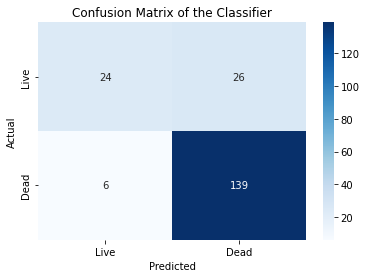

In [26]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Live', 'Dead'])

In [27]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7193


In [28]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['sig_3']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.72)
('age_dateOfBirth', 0.01)
('dateOfBirth', -0.0)
('book1_A_Game_Of_Thrones', -1.01)
('book4_A_Feast_For_Crows', 1.23)
('numDeadRelations', -0.19)
('popularity', -0.49)
('gender_female', 0.22)
('gender_male', -0.24)


In [29]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [30]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8915
Full Tree Testing ACCURACY : 0.8872
Full Tree AUC Score: 0.839


In [31]:

# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
confusion_matrix
---------------------------
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


confusion_matrix
---------------------------
True Negatives : 37
False Positives: 13
False Negatives: 9
True Positives : 136



In [32]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 6,
                                     min_samples_leaf = 10,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc


Training ACCURACY: 0.8429
Testing  ACCURACY: 0.9026
AUC Score        : 0.8166


In [33]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 1
True Positives : 144



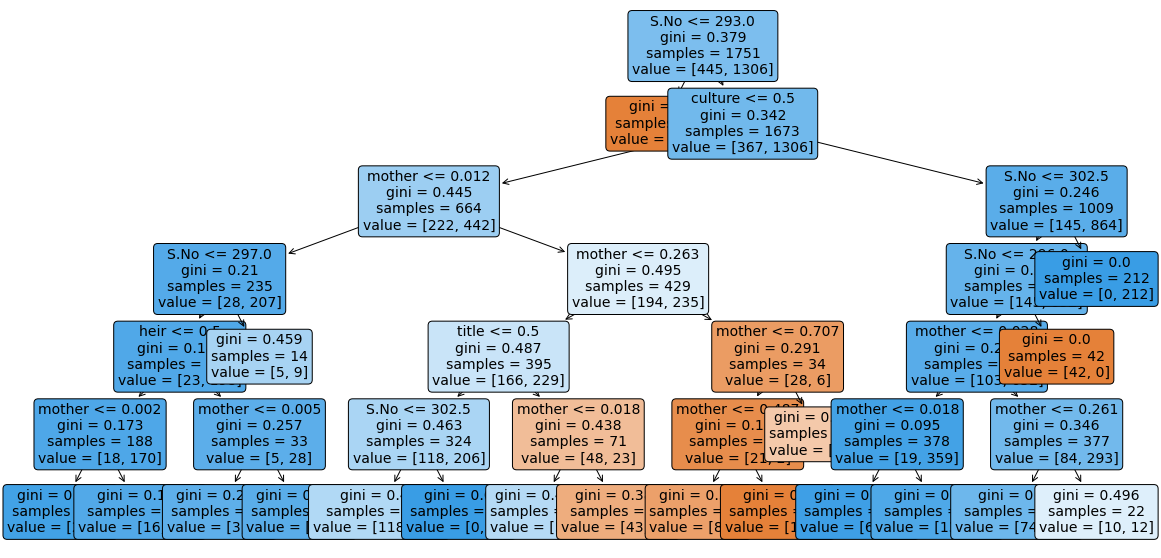

In [34]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

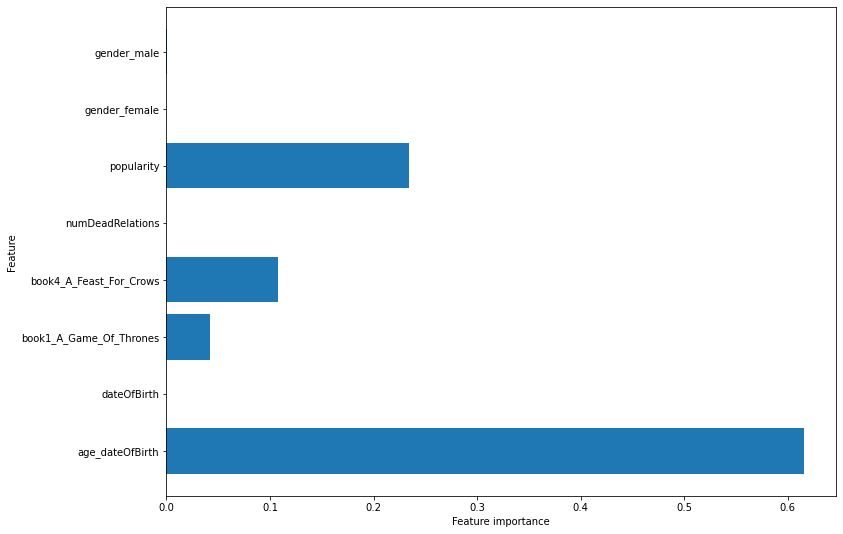

In [35]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [36]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)





Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7193         (24, 26, 6, 139)
Full Tree     0.839           (37, 13, 9, 136)
Pruned Tree   0.8166         (32, 18, 1, 144)



 KNN

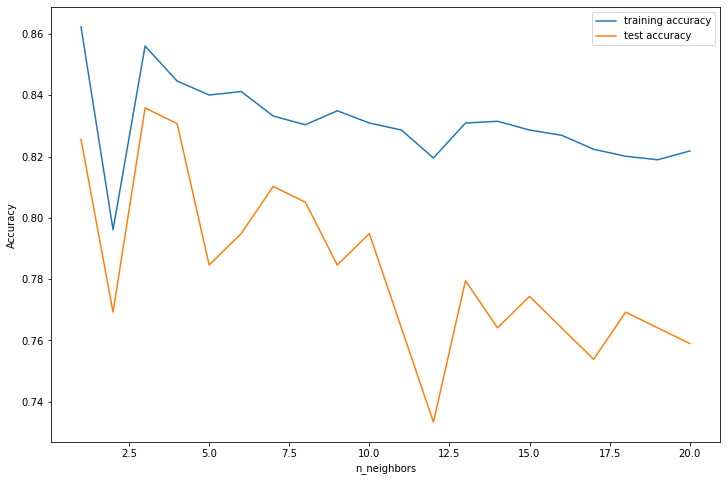

The optimal number of neighbors is: 3


In [37]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_data,
                                  y_data        = GOT_target,
                                  response_type = 'class')

In [38]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
Confusion matrix
----------------------------
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")

Training ACCURACY: 0.8447
Testing  ACCURACY: 0.8154
AUC Score        : 0.7514

Confusion matrix
----------------------------
True Negatives : 31
False Positives: 19
False Negatives: 17
True Positives : 128



In [39]:
GOT

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender_andy,gender_female,gender_male,gender_mostly_female,gender_mostly_male,gender_unknown,age_dateOfBirth
0,1,Viserys II Targaryen,unknown,unknown,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,1,295.0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,1,305.0
2,3,Addison Hill,Ser,unknown,268.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,27.0,0,0.267559,1,1,0,0,0,0,0,295.0
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.0,0,0.183946,0,0,0,0,0,0,1,105.0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,unknown,Westeros,268.0,unknown,unknown,unknown,House Stark,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.351171,0,0,0,0,0,0,1,295.0
1942,1943,Reek,unknown,unknown,268.0,unknown,unknown,unknown,House Bolton,unknown,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.096990,0,0,0,0,0,0,1,295.0
1943,1944,Symeon Star-Eyes,unknown,unknown,268.0,unknown,unknown,unknown,unknown,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.030100,1,0,0,1,0,0,0,295.0
1944,1945,Coldhands,unknown,unknown,268.0,unknown,unknown,unknown,Three-eyed crow,unknown,0,0,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,27.0,0,0.130435,1,0,0,0,0,0,1,295.0


# Hyperparameter Tuning

In [40]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [41]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [42]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.771
Testing  ACCURACY: 0.8359
AUC Score        : 0.7193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)

In [44]:
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
1,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
2,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"


In [45]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
KNN           {knn_auc_score}            {knn_tn, knn_fp, knn_fn, knn_tp}
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['KNN','Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' :         [knn_auc_score,logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [knn_train_score,logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [knn_test_score,logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(knn_tn, knn_fp, knn_fn, knn_tp),(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)
                           ]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
KNN           0.7514            (31, 19, 17, 128)
Logistic      0.7193         (24, 26, 6, 139)
Full Tree     0.839           (37, 13, 9, 136)
Pruned Tree   0.8166         (32, 18, 1, 144)





Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 4.9}
Tuned CV AUC      : 0.661

In [46]:


# INSTANTIATING a logistic regression model
lr_tuned = LogisticRegression(solver = 'newton-cg',
                            C = 4.9,
                            max_iter     = 1000,
                            warm_start=False,
                            random_state = 219)



# FITTING the model to the full dataset
lr_tuned.fit(GOT_data, GOT_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))



# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy
# displaying and saving the gap between training and testing
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")

LR Tuned Training ACCURACY: 0.799
LR Tuned Testing  ACCURACY: 0.8513
LR Tuned AUC Score        : 0.7428

True Negatives : 26
False Positives: 24
False Negatives: 5
True Positives : 140



C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [47]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"


Tuned Parameters : {'splitter': 'best', 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'gini'} Tuned Training AUC: 0.7468

In [48]:


# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 2,
                                    max_depth        = 5,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))

# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(tree_tuned_train_score - tree_tuned_test_score).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))
# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")

Training ACCURACY: 0.8441
Testing  ACCURACY: 0.9077
Train-Test Gap   : 0.0636
AUC Score        : 0.8266

True Negatives : 33
False Positives: 17
False Negatives: 1
True Positives : 144



In [49]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"
5,Tuned Tree,0.8266,0.8441,0.9077,"(33, 17, 1, 144)"


Random Forest

In [50]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [51]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

Training ACCURACY: 0.8915
Testing  ACCURACY: 0.8923
AUC Score        : 0.8359

True Negatives : 36
False Positives: 14
False Negatives: 7
True Positives : 138



In [52]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"
5,Tuned Tree,0.8266,0.8441,0.9077,"(33, 17, 1, 144)"
6,Random Forest (Full),0.8359,0.8915,0.8923,"(36, 14, 7, 138)"


RandomizedSearchCV

Tuned Parameters : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False} Tuned Training AUC: 0.739

In [53]:


# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 400,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      max_depth        = 8,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))



# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy
# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(forest_tuned_train_score - forest_tuned_test_score).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))
# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")

Forest Tuned Training ACCURACY: 0.8567
Forest Tuned Testing  ACCURACY: 0.9128
Train-Test Gap   : 0.0561
Forest Tuned AUC Score        : 0.8431

True Negatives : 35
False Positives: 15
False Negatives: 2
True Positives : 143



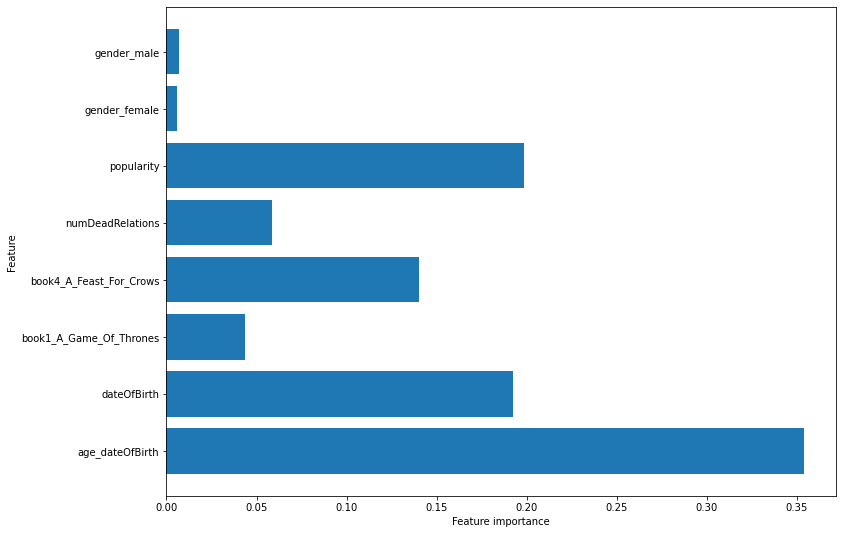

In [54]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [55]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"
5,Tuned Tree,0.8266,0.8441,0.9077,"(33, 17, 1, 144)"
6,Random Forest (Full),0.8359,0.8915,0.8923,"(36, 14, 7, 138)"
7,Tuned Random Forest (Full),0.8431,0.8567,0.9128,"(35, 15, 2, 143)"


Gradient Boosted Machines

In [56]:

from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")

Training ACCURACY: 0.8629
Testing ACCURACY : 0.9026
AUC Score        : 0.8297

True Negatives : 34
False Positives: 16
False Negatives: 3
True Positives : 142



In [57]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"
5,Tuned Tree,0.8266,0.8441,0.9077,"(33, 17, 1, 144)"
6,Random Forest (Full),0.8359,0.8915,0.8923,"(36, 14, 7, 138)"
7,Tuned Random Forest (Full),0.8431,0.8567,0.9128,"(35, 15, 2, 143)"
8,GBM (Full),0.8297,0.8629,0.9026,"(34, 16, 3, 142)"


hyperparameters of a Tuned GBM model

GOT_data, GOT_target
GradientBoostingClassifier(learning_rate=0.6, max_depth=2, n_estimators=125, random_state=219, warm_start=True)

In [58]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 2,
                                       n_estimators  = 125,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(GOT_data, GOT_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")

Training ACCURACY: 0.8686
Testing  ACCURACY: 0.9231
AUC Score        : 0.8631

True Negatives : 37
False Positives: 13
False Negatives: 2
True Positives : 143



In [59]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Recommended *Tuned GBM*Model',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,KNN,0.7514,0.8447,0.8154,"(31, 19, 17, 128)"
1,Logistic,0.7193,0.7710,0.8359,"(24, 26, 6, 139)"
2,Full Tree,0.8390,0.8915,0.8872,"(37, 13, 9, 136)"
3,Pruned Tree,0.8166,0.8429,0.9026,"(32, 18, 1, 144)"
4,Tuned LR,0.7428,0.7990,0.8513,"(26, 24, 5, 140)"
5,Tuned Tree,0.8266,0.8441,0.9077,"(33, 17, 1, 144)"
6,Random Forest (Full),0.8359,0.8915,0.8923,"(36, 14, 7, 138)"
7,Tuned Random Forest (Full),0.8431,0.8567,0.9128,"(35, 15, 2, 143)"
8,GBM (Full),0.8297,0.8629,0.9026,"(34, 16, 3, 142)"
9,Recommended *Tuned GBM*Model,0.8631,0.8686,0.9231,"(37, 13, 2, 143)"
